<a href="https://colab.research.google.com/github/mariell-morven/Predictive_Models-US_DOT/blob/main/An%C3%A1lisis_Exploratorio_%26_Modelos_Predictivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de librerías,
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# & paquetes
from google.cloud import bigquery
from google.colab import auth

In [ ]:
# Autenticación
auth.authenticate_user()

# BigQuery
project_id = 'proyecto-no4-datalab'
client = bigquery.Client(project=project_id)

# Análisis Exploratorio

In [ ]:
# Query SQL
query = """
SELECT *
FROM proyecto-no4-datalab.dataset_p4.flights
"""

# Ejecutar la consulta en BigQuery y obtener los resultados
query_job = client.query(query)
original = query_job.to_dataframe()

In [ ]:
# Estructura: filas y columnas
original.shape

(538837, 33)

In [ ]:
# Valores no nulos, tipo de dato de cada columna y el uso de memoria
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538837 entries, 0 to 538836
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   FL_DATE                  538837 non-null  dbdate
 1   AIRLINE_CODE             538837 non-null  object
 2   DOT_CODE                 538837 non-null  Int64 
 3   FL_NUMBER                538837 non-null  Int64 
 4   ORIGIN                   538837 non-null  object
 5   ORIGIN_CITY              538837 non-null  object
 6   DEST                     538837 non-null  object
 7   DEST_CITY                538837 non-null  object
 8   CRS_DEP_TIME             538837 non-null  Int64 
 9   DEP_TIME                 528859 non-null  Int64 
 10  DEP_DELAY                528855 non-null  Int64 
 11  TAXI_OUT                 528640 non-null  Int64 
 12  WHEELS_OFF               528640 non-null  Int64 
 13  WHEELS_ON                528318 non-null  Int64 
 14  TAXI_IN             

In [ ]:
# Recuento de valores nulos en cada columna
original.isna().sum()

FL_DATE                         0
AIRLINE_CODE                    0
DOT_CODE                        0
FL_NUMBER                       0
ORIGIN                          0
ORIGIN_CITY                     0
DEST                            0
DEST_CITY                       0
CRS_DEP_TIME                    0
DEP_TIME                     9978
DEP_DELAY                    9982
TAXI_OUT                    10197
WHEELS_OFF                  10197
WHEELS_ON                   10519
TAXI_IN                     10519
CRS_ARR_TIME                    0
ARR_TIME                    10519
ARR_DELAY                   11640
CANCELLED                       0
CANCELLATION_CODE               0
DIVERTED                        0
CRS_ELAPSED_TIME                1
ELAPSED_TIME                11640
AIR_TIME                    11640
DISTANCE                        0
DELAY_DUE_CARRIER          422124
DELAY_DUE_WEATHER          422124
DELAY_DUE_NAS              422124
DELAY_DUE_SECURITY         422124
DELAY_DUE_LATE

In [ ]:
# Resumen estadístico: distribución y variabilidad
original.describe()

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FL_YEAR,FL_MONTH,FL_DAY
count,538837.0,538837.0,538837.0,528859.0,528855.0,528640.0,528640.0,528318.0,528318.0,538837.0,...,527197.0,538837.0,116713.0,116713.0,116713.0,116713.0,116713.0,538837.0,538837.0,538837.0
mean,19944.883041,2201.929604,1327.415619,1334.441891,12.937247,18.334566,1358.483518,1471.856121,8.038,1497.177636,...,115.814365,830.110802,24.509343,4.383968,14.648488,0.146248,25.755743,2023.0,1.0,16.095398
std,374.068602,1547.198171,489.902674,502.427715,55.435948,10.62446,503.858558,532.185174,6.416574,515.236763,...,71.811305,600.126873,73.732581,38.069314,32.531918,2.895832,57.507827,0.0,0.0,8.929168
min,19393.0,1.0,5.0,1.0,-52.0,1.0,1.0,1.0,1.0,1.0,...,8.0,31.0,0.0,0.0,0.0,0.0,0.0,2023.0,1.0,1.0
25%,19790.0,972.0,910.0,917.0,-6.0,12.0,934.0,1054.0,4.0,1109.0,...,63.0,397.0,0.0,0.0,0.0,0.0,0.0,2023.0,1.0,8.0
50%,19930.0,1909.0,1320.0,1327.0,-2.0,15.0,1341.0,1509.0,6.0,1520.0,...,99.0,679.0,3.0,0.0,1.0,0.0,0.0,2023.0,1.0,16.0
75%,20363.0,3056.0,1732.0,1743.0,10.0,21.0,1757.0,1917.0,9.0,1927.0,...,146.0,1067.0,23.0,0.0,18.0,0.0,29.0,2023.0,1.0,24.0
max,20452.0,9887.0,2359.0,2400.0,3024.0,222.0,2400.0,2400.0,173.0,2359.0,...,695.0,5095.0,3024.0,1653.0,1343.0,234.0,2027.0,2023.0,1.0,31.0


## Correlaciones

Sin considerar las variables con códigos, categóricas y de tiempo redudantes

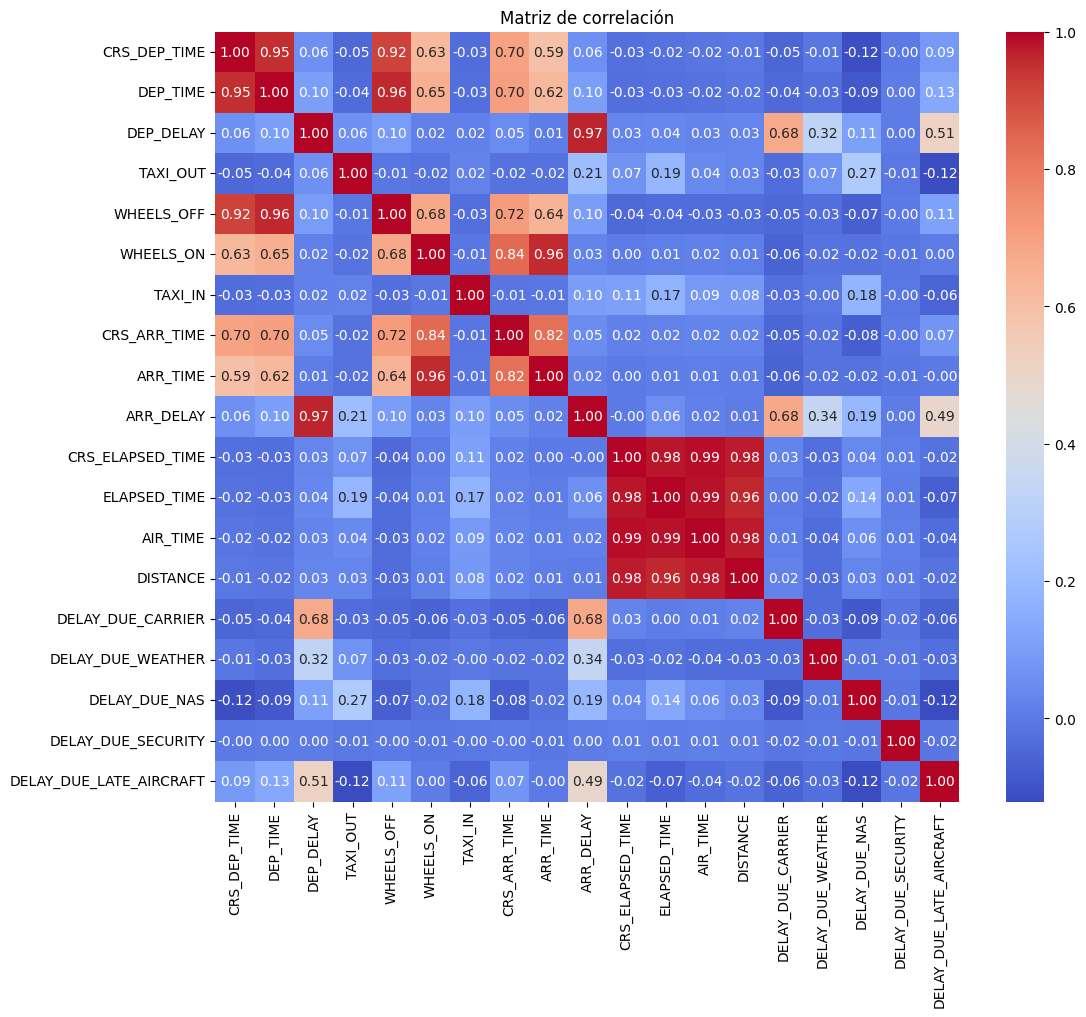

In [ ]:
# Seleccionar variables
selected_variables = [
  'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY','TAXI_OUT','WHEELS_OFF', 'WHEELS_ON',
  'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
  'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
  'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
  'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'
]

# Matriz de Correlación
correlation_matrix = original [selected_variables].corr()

# Visualizar la matriz de correlación usando Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Relación entre los retrasos registrados durante el despegue (DEP_DELAY) y el aterrizaje (ARR_DELAY)

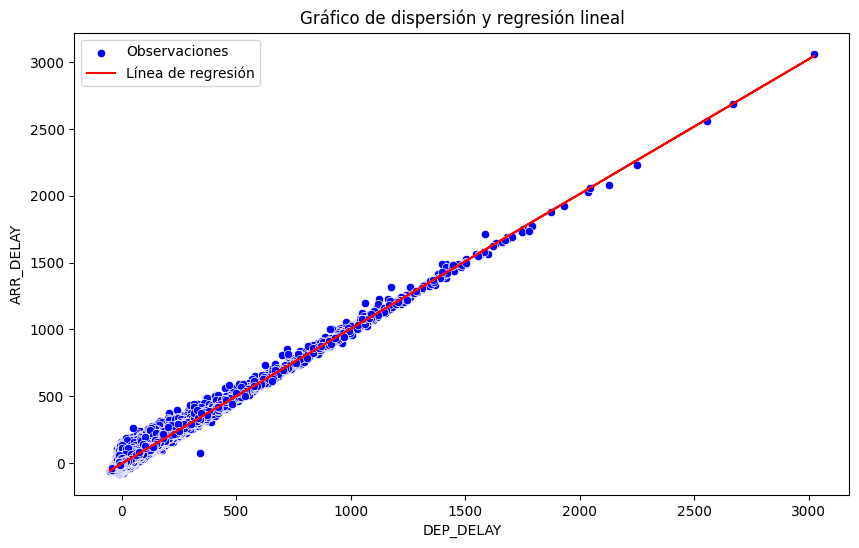

Coeficiente de la regresión (pendiente): 1.009194922273111
Término independiente: -5.1826337874575685


In [ ]:
# Filtrar las columnas DEP_DELAY y ARR_DELAY
data = original [['DEP_DELAY', 'ARR_DELAY']].dropna()

# Definir variables independiente (DEP_DELAY) y dependiente (ARR_DELAY)
X = data[['DEP_DELAY']]
y = data['ARR_DELAY']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Predecir los valores de ARR_DELAY
y_pred = model.predict(X)

# Visualizar el gráfico de dispersión y la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=data, color='blue', label='Observaciones')
plt.plot(X, y_pred, color='red', label='Línea de regresión')
plt.title('Gráfico de dispersión y regresión lineal')
plt.xlabel('DEP_DELAY')
plt.ylabel('ARR_DELAY')
plt.legend()
plt.show()

# Imprimir los coeficientes de la regresión
print('Coeficiente de la regresión (pendiente):', model.coef_[0])
print('Término independiente:', model.intercept_)


## Outliers

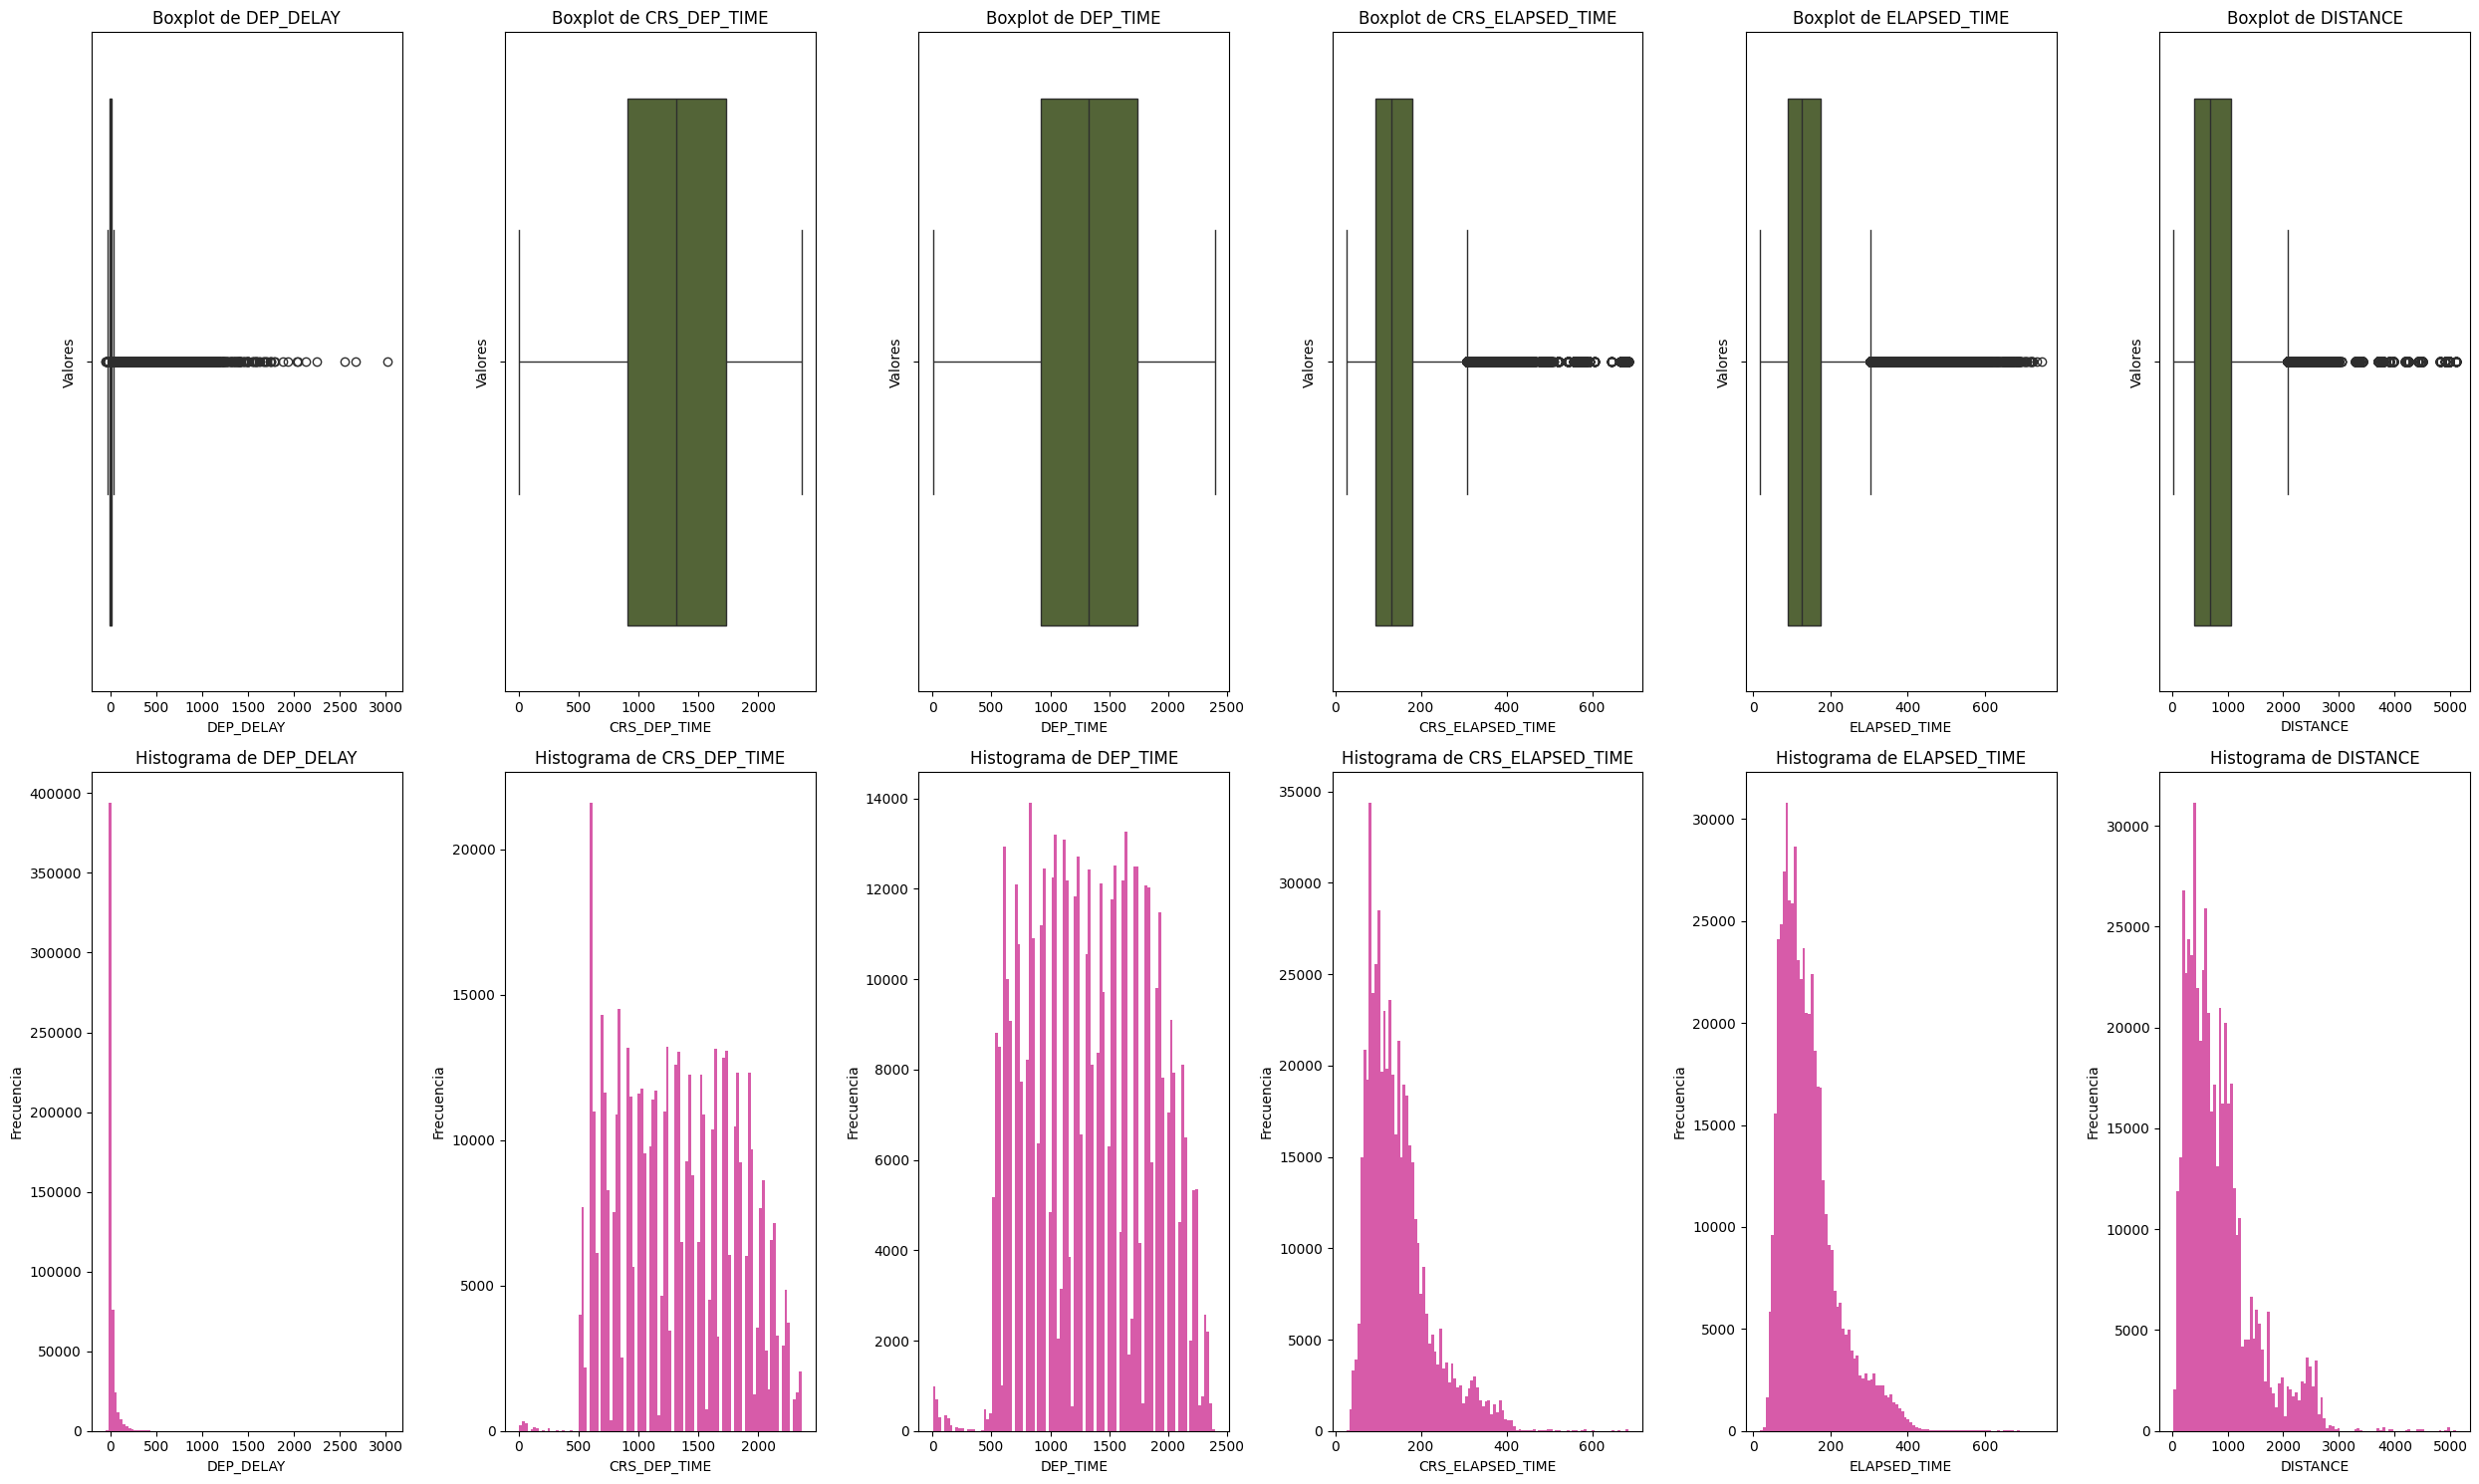

Valores extremos:
DEP_DELAY:
  Cantidad de outliers: 64727
  Valor mínimo: -52
  Valor máximo: 3024
  Bigote: -52


CRS_DEP_TIME:
  Cantidad de outliers: 0
  Valor mínimo: 5
  Valor máximo: 2359
No hay outliers


DEP_TIME:
  Cantidad de outliers: 0
  Valor mínimo: 1
  Valor máximo: 2400
No hay outliers


CRS_ELAPSED_TIME:
  Cantidad de outliers: 26407
  Valor mínimo: 26
  Valor máximo: 685
  Bigote: 309


ELAPSED_TIME:
  Cantidad de outliers: 25005
  Valor mínimo: 17
  Valor máximo: 749
  Bigote: 304


DISTANCE:
  Cantidad de outliers: 31002
  Valor mínimo: 31
  Valor máximo: 5095
  Bigote: 2078




In [ ]:
# Seleccionar columnas relevantes
selected_columns = ['DEP_DELAY','CRS_DEP_TIME','DEP_TIME','CRS_ELAPSED_TIME','ELAPSED_TIME','DISTANCE']

# Crear un nuevo DataFrame con las columnas seleccionadas y eliminar filas con valores nulos
df_selected =  original [selected_columns].dropna()

# Configurar el tamaño del gráfico (aumentado)
plt.figure(figsize=(25, 15))

# Crear un diccionario para almacenar la cantidad de outliers y los valores más extremos por variable
outliers_info_dict = {}

# Iterar sobre las columnas seleccionadas y crear subgráficos para boxplot y histograma
for i, column in enumerate(selected_columns, 1):
    # Calcular los percentiles para identificar outliers
    Q1 = df_selected[column].quantile(0.25)
    Q3 = df_selected[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para identificar outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filtrar datos para identificar outliers
    outliers = df_selected[(df_selected[column] < lower_limit) | (df_selected[column] > upper_limit)]

    # Almacenar información sobre outliers y valores más extremos
    outliers_info_dict[column] = {
        'outliers_count': len(outliers),
        'min_value': df_selected[column].min(),
        'max_value': df_selected[column].max(),
        'first_outlier_value': outliers[column].min() if not outliers.empty else None,
    }

    # Crear subgráficos para boxplot y histograma
    plt.subplot(2, len(selected_columns), i)
    sns.boxplot(x=df_selected[column], color='darkolivegreen')
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.ylabel('Valores')

    plt.subplot(2, len(selected_columns), i + len(selected_columns))
    plt.hist(df_selected[column], bins=100, color='mediumvioletred', alpha=0.7)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

# Imprimir la información sobre outliers por variable
print("\033[1mValores extremos:\033[0m")
for column, info in outliers_info_dict.items():
    print(f'{column}:')
    print(f'  Cantidad de outliers: {info["outliers_count"]}')
    print(f'  Valor mínimo: {info["min_value"]}')
    print(f'  Valor máximo: {info["max_value"]}')
    if info['first_outlier_value'] is not None:
        print(f'  Bigote: {info["first_outlier_value"]}')
    else:
        print('\033[1mNo hay outliers\033[0m')
    print('\n')



# **Matrices de Confusión:**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
query = """
SELECT *
FROM proyecto-no4-datalab.dataset_p4.models
"""

query_job = client.query(query)
df = query_job.to_dataframe()

# — Modelo Manual

A partir de un score establecido por el Principio de Pareto sobre el Riesgo Relativo ya calculado

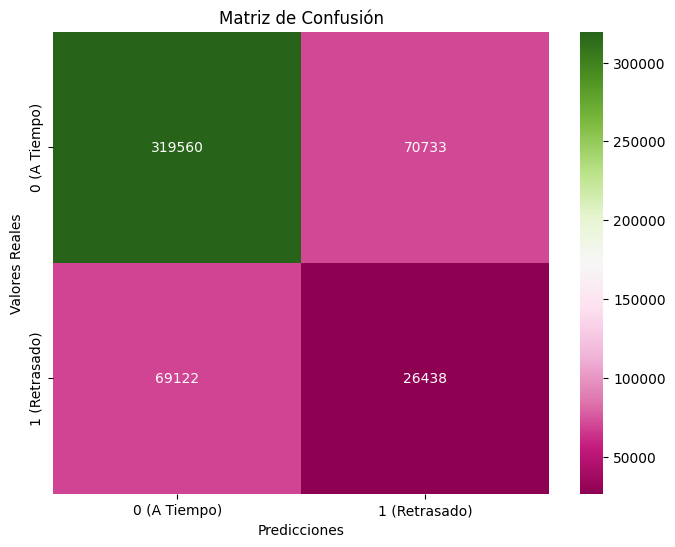


Métricas de Evaluación:
Exactitud (Accuracy):  0.71215
Precisión:  0.27208
Sensibilidad (Recall):  0.27666
F1-score:  0.27435


In [ ]:
# Obtener las etiquetas verdaderas y predichas
y_true = df ['DELAYS']
y_pred = df ['DELAYS_NEW']

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Visualización gráfica de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="PiYG", xticklabels=['0 (A Tiempo)', '1 (Retrasado)'], yticklabels=['0 (A Tiempo)', '1 (Retrasado)'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar las Métricas de Evaluación
print("\n\033[1mMétricas de Evaluación:\033[0m")
print(f"Exactitud (Accuracy): {accuracy: .5f}")
print(f"Precisión: {precision: .5f}")
print(f"Sensibilidad (Recall): {recall: .5f}")
print(f"F1-score: {f1: .5f}")

# — Regresión Logística...

**One-Hot Encoding:** transformación de data categórica en vectores binarios

---


*Variables categóricas predictoras*
* **CRS_DEP_Category** - hora de despegue programado:
> Madrugada, Mañana, Tarde, y Noche;
* **FLDAY_WEEK** - día de la semana:
> Domingo, Lunes, Martes, Miércoles, Jueves, Viernes, y Sábado;
*  **DISTANCE_Category** - longitud del vuelo:
> Corto, Medio, Largo, y Extendido;
*  **ORIGIN_Size** - tamaño del aeropuerto de origen:
> Large hub, Medium hub, Small hub y Nonhub;
*  **DESCRIPTION_Category** - tipo de aereolínea:
> Principal, y Regional;
*  **ORIGIN_Region** - región de origen:
> Capital, East North Central, East South Central, Great Basin, Mid-Atlantic, New England, Pacific, South Atlantic, West North Central, West South Central
*  **CRS_TIME_Category** - tiempo programado del vuelo:
> Corto, Medio, Largo, y Extendido;

*Etiqueta real*
* **DELAYS** - vuelos retrasados (1) o no (0)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Variables categóricas
categorical_columns = ['CRS_DEP_Category', 'FLDAY_WEEK', 'DISTANCE_Category',
                        'ORIGIN_Size', 'DESCRIPTION_Category', 'ORIGIN_Region',
                        'CRS_TIME_Category']

# Seleccionar las variables categóricas del DataFrame
X_categorical = df [categorical_columns]

# Crear y ajustar OneHotEncoder a los datos categóricos
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X_categorical)

# Convertir la salida a un DataFrame
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Visualizar el DataFrame codificado
display(X_encoded_df)

,CRS_DEP_Category_Madrugada,CRS_DEP_Category_Mañana,CRS_DEP_Category_Noche,CRS_DEP_Category_Tarde,FLDAY_WEEK_Friday,FLDAY_WEEK_Monday,FLDAY_WEEK_Saturday,FLDAY_WEEK_Sunday,FLDAY_WEEK_Thursday,FLDAY_WEEK_Tuesday,...,ORIGIN_Region_Mid-Atlantic,ORIGIN_Region_New England,ORIGIN_Region_Pacific,ORIGIN_Region_South Atlantic,ORIGIN_Region_West North Central,ORIGIN_Region_West South Central,CRS_TIME_Category_Corto,CRS_TIME_Category_Extendido,CRS_TIME_Category_Largo,CRS_TIME_Category_Medio
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485848,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
485849,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
485850,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
485851,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## ...balanceada con Class Weight

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

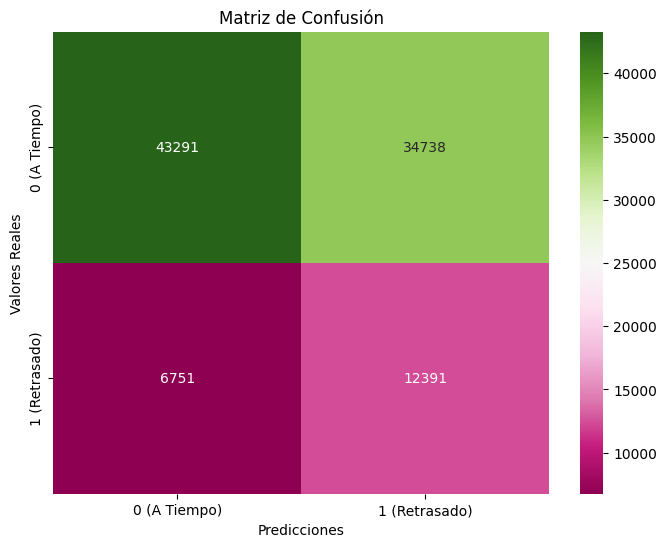


Métricas de Evaluación:
Exactitud (Accuracy):  0.57303
Precisión:  0.26292
Sensibilidad (Recall):  0.64732
F1-score:  0.37395


In [ ]:
# Variables categóricas
categorical_columns = ['CRS_DEP_Category', 'FLDAY_WEEK', 'DISTANCE_Category',
                        'ORIGIN_Size', 'DESCRIPTION_Category', 'ORIGIN_Region',
                        'CRS_TIME_Category']

# Variables independientes y dependiente
X = df [categorical_columns]
y = df ['DELAYS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el transformador para aplicar OneHotEncoder a las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Crear el modelo de regresión logística con class_weight='balanced'
model = LogisticRegression(class_weight='balanced')

# Crear el pipeline que incluye el preprocesamiento y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Visualización gráfica de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="PiYG", xticklabels=['0 (A Tiempo)', '1 (Retrasado)'], yticklabels=['0 (A Tiempo)', '1 (Retrasado)'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar las Métricas de Evaluación
print("\n\033[1mMétricas de Evaluación:\033[0m")
print(f"Exactitud (Accuracy): {accuracy: .5f}")
print(f"Precisión: {precision: .5f}")
print(f"Sensibilidad (Recall): {recall: .5f}")
print(f"F1-score: {f1: .5f}")

## ...balanceada con SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

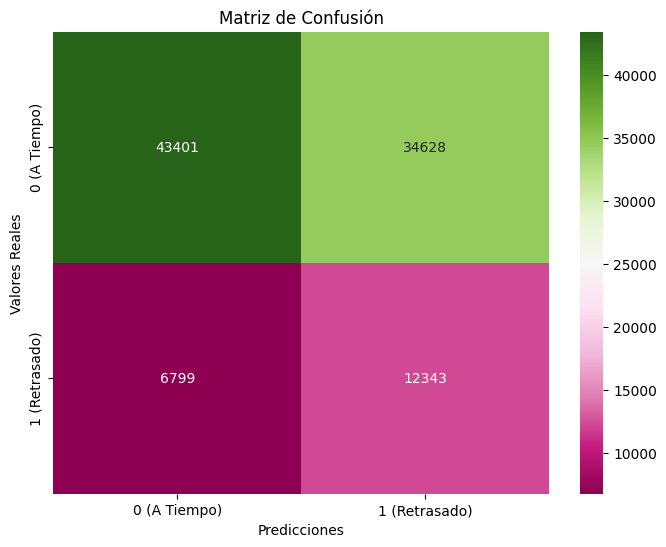


Métricas de Evaluación:
Exactitud (Accuracy):  0.57367
Precisión:  0.26278
Sensibilidad (Recall):  0.64481
F1-score:  0.37339


In [ ]:
# Variables categóricas
categorical_columns = ['CRS_DEP_Category', 'FLDAY_WEEK', 'DISTANCE_Category',
                        'ORIGIN_Size', 'DESCRIPTION_Category', 'ORIGIN_Region',
                        'CRS_TIME_Category']

# Variables independientes y dependiente
X = df [categorical_columns]
y = df ['DELAYS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificar variables categóricas con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ], remainder='passthrough')

# Aplicar OneHotEncoder y SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_encoded = preprocessor.fit_transform(X_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con el conjunto de datos aumentado
model.fit(X_train_smote, y_train_smote)

# Aplicar OneHotEncoder al conjunto de prueba
X_test_encoded = preprocessor.transform(X_test)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_encoded)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Visualización gráfica de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="PiYG", xticklabels=['0 (A Tiempo)', '1 (Retrasado)'], yticklabels=['0 (A Tiempo)', '1 (Retrasado)'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar las Métricas de Evaluación
print("\n\033[1mMétricas de Evaluación:\033[0m")
print(f"Exactitud (Accuracy): {accuracy: .5f}")
print(f"Precisión: {precision: .5f}")
print(f"Sensibilidad (Recall): {recall: .5f}")
print(f"F1-score: {f1: .5f}")

## ...con Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

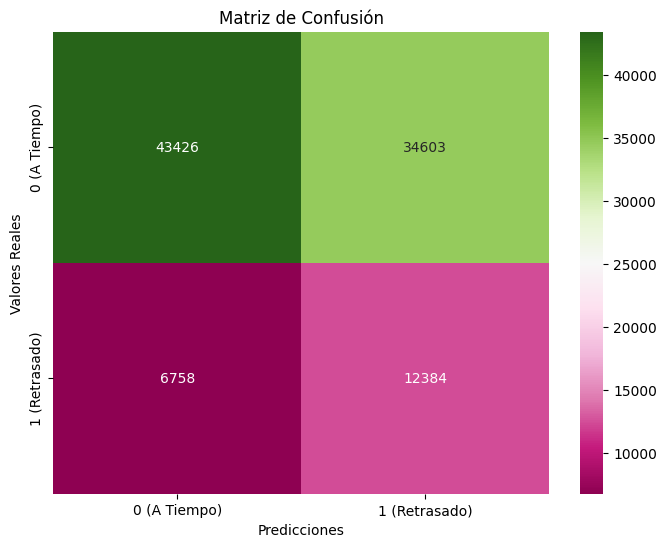


Métricas de Evaluación:
Exactitud (Accuracy):  0.57435
Precisión:  0.26356
Sensibilidad (Recall):  0.64695
F1-score:  0.37454


In [ ]:
# Variables categóricas
categorical_columns = ['CRS_DEP_Category', 'FLDAY_WEEK', 'DISTANCE_Category',
                        'ORIGIN_Size', 'DESCRIPTION_Category', 'ORIGIN_Region',
                        'CRS_TIME_Category']

# Variables independientes y dependiente
X = df [categorical_columns]
y = df ['DELAYS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el transformador para aplicar OneHotEncoder a las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Aplicar submuestreo aleatorio para manejar el desequilibrio de clases
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Crear el pipeline que incluye el preprocesamiento y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Entrenar el modelo con los datos submuestreados
pipeline.fit(X_resampled, y_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Visualización gráfica de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="PiYG", xticklabels=['0 (A Tiempo)', '1 (Retrasado)'], yticklabels=['0 (A Tiempo)', '1 (Retrasado)'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar las Métricas de Evaluación
print("\n\033[1mMétricas de Evaluación:\033[0m")
print(f"Exactitud (Accuracy): {accuracy: .5f}")
print(f"Precisión: {precision: .5f}")
print(f"Sensibilidad (Recall): {recall: .5f}")
print(f"F1-score: {f1: .5f}")

## ...con Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

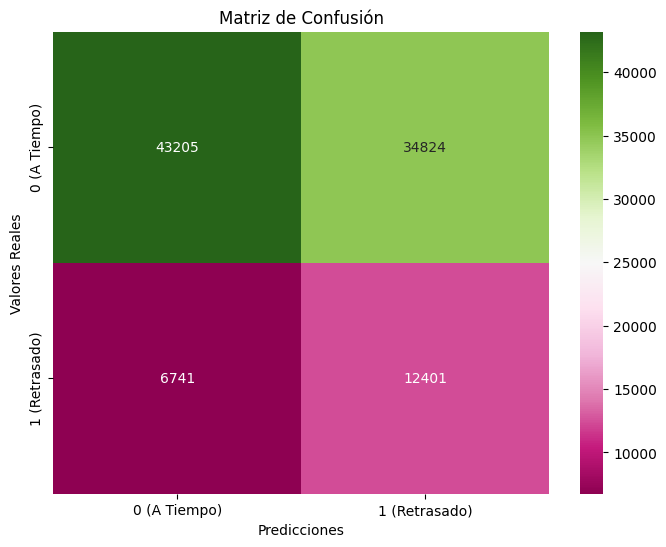


Métricas de Evaluación:
Exactitud (Accuracy):  0.57225
Precisión:  0.26259
Sensibilidad (Recall):  0.64784
F1-score:  0.37371


In [ ]:
# Variables categóricas
categorical_columns = ['CRS_DEP_Category', 'FLDAY_WEEK', 'DISTANCE_Category',
                        'ORIGIN_Size', 'DESCRIPTION_Category', 'ORIGIN_Region',
                        'CRS_TIME_Category']

# Variables independientes y dependiente
X = df [categorical_columns]
y = df ['DELAYS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el transformador para aplicar OneHotEncoder a las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Aplicar sobresampling aleatorio para manejar el desequilibrio de clases
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Crear el pipeline que incluye el preprocesamiento y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Entrenar el modelo con los datos sobremuestreados
pipeline.fit(X_resampled, y_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Visualización gráfica de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="PiYG", xticklabels=['0 (A Tiempo)', '1 (Retrasado)'], yticklabels=['0 (A Tiempo)', '1 (Retrasado)'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar las Métricas de Evaluación
print("\n\033[1mMétricas de Evaluación:\033[0m")
print(f"Exactitud (Accuracy): {accuracy: .5f}")
print(f"Precisión: {precision: .5f}")
print(f"Sensibilidad (Recall): {recall: .5f}")
print(f"F1-score: {f1: .5f}")

# — Random Forest...

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Target Encoder

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import TargetEncoder

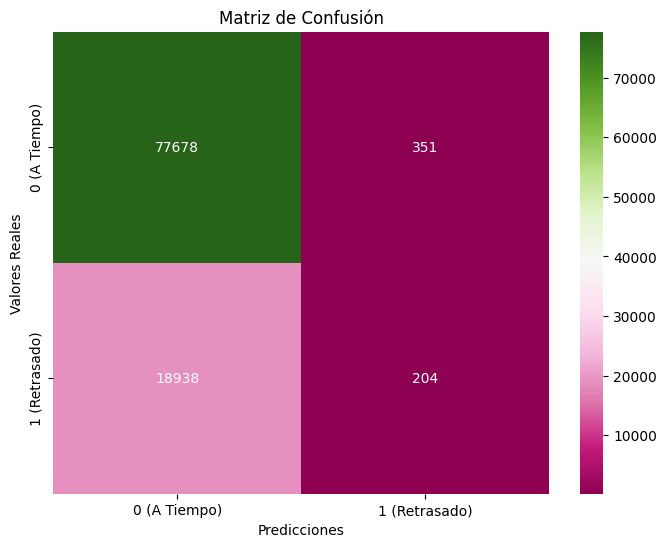


Métricas de Evaluación:
Exactitud (Accuracy):  0.80149
Precisión:  0.36757
Sensibilidad (Recall):  0.01066
F1-score:  0.02071


In [ ]:
# Variables categóricas
categorical_columns = ['CRS_DEP_Category', 'FLDAY_WEEK', 'DISTANCE_Category',
                        'ORIGIN_Size', 'DESCRIPTION_Category', 'ORIGIN_Region',
                        'CRS_TIME_Category']

# Variables independientes y dependiente
X = df [categorical_columns]
y = df ['DELAYS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Aplicar Target Encoding a las variables categóricas
target_encoder = TargetEncoder(cols=categorical_columns)
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

# Entrenar el modelo Random Forest
model_rf.fit(X_train_encoded, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test_encoded)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Visualización gráfica de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="PiYG", xticklabels=['0 (A Tiempo)', '1 (Retrasado)'], yticklabels=['0 (A Tiempo)', '1 (Retrasado)'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar las Métricas de Evaluación
print("\n\033[1mMétricas de Evaluación:\033[0m")
print(f"Exactitud (Accuracy): {accuracy: .5f}")
print(f"Precisión: {precision: .5f}")
print(f"Sensibilidad (Recall): {recall: .5f}")
print(f"F1-score: {f1: .5f}")

Frequency Encoding

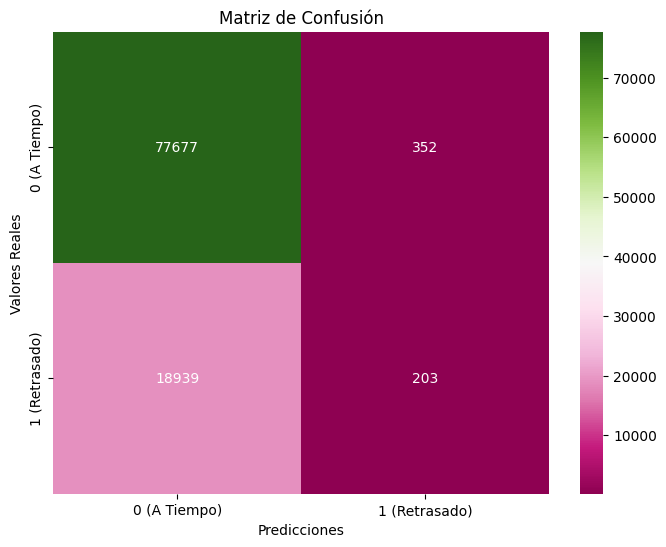


Métricas de Evaluación:
Exactitud (Accuracy):  0.80147
Precisión:  0.36577
Sensibilidad (Recall):  0.01060
F1-score:  0.02061


In [ ]:
# Variables categóricas
categorical_columns = ['CRS_DEP_Category', 'FLDAY_WEEK', 'DISTANCE_Category',
                        'ORIGIN_Size', 'DESCRIPTION_Category', 'ORIGIN_Region',
                        'CRS_TIME_Category']

# Variables independientes y dependiente
X = df [categorical_columns]
y = df ['DELAYS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Aplicar Frequency Encoding a las variables categóricas
for column in categorical_columns:
    frequency_encoding = X_train[column].value_counts(normalize=True)
    X_train[column] = X_train[column].map(frequency_encoding)
    X_test[column] = X_test[column].map(frequency_encoding)

# Entrenar el modelo Random Forest
model_rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Visualización gráfica de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="PiYG", xticklabels=['0 (A Tiempo)', '1 (Retrasado)'], yticklabels=['0 (A Tiempo)', '1 (Retrasado)'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar las Métricas de Evaluación
print("\n\033[1mMétricas de Evaluación:\033[0m")
print(f"Exactitud (Accuracy): {accuracy: .5f}")
print(f"Precisión: {precision: .5f}")
print(f"Sensibilidad (Recall): {recall: .5f}")
print(f"F1-score: {f1: .5f}")

# — Decision Tree Classifier...

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## ...balanceado con Class Weight

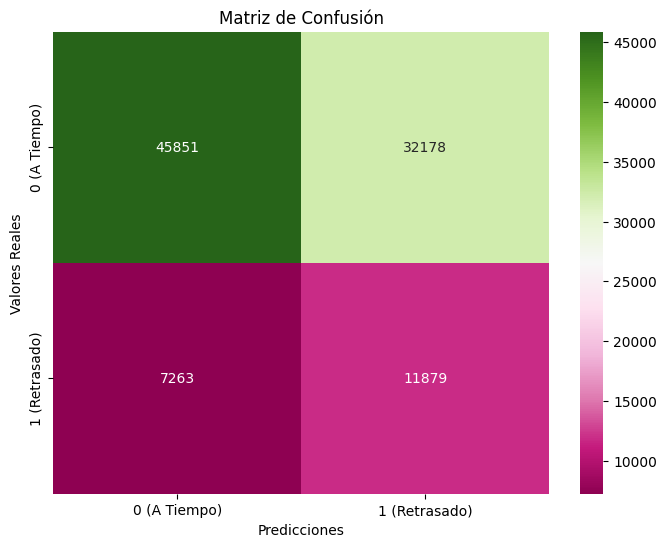


Métricas de Evaluación:
Exactitud (Accuracy):  0.59411
Precisión:  0.26963
Sensibilidad (Recall):  0.62057
F1-score:  0.37592


In [ ]:
# Variables categóricas
categorical_columns = ['CRS_DEP_Category', 'FLDAY_WEEK', 'DISTANCE_Category',
                        'ORIGIN_Size', 'DESCRIPTION_Category', 'ORIGIN_Region',
                        'CRS_TIME_Category']

# Variables independientes y dependiente
X = df [categorical_columns]
y = df ['DELAYS']

# Convertir variables categóricas en variables ficticias utilizando One-Hot Encoding
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de árbol de decisión con balanceo de clases
modelo_arbol = DecisionTreeClassifier(class_weight='balanced')
modelo_arbol.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo_arbol.predict(X_test)

# Evaluar el rendimiento del modelo
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Visualización gráfica de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="PiYG", xticklabels=['0 (A Tiempo)', '1 (Retrasado)'], yticklabels=['0 (A Tiempo)', '1 (Retrasado)'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar las Métricas de Evaluación
print("\n\033[1mMétricas de Evaluación:\033[0m")
print(f"Exactitud (Accuracy): {accuracy: .5f}")
print(f"Precisión: {precision: .5f}")
print(f"Sensibilidad (Recall): {recall: .5f}")
print(f"F1-score: {f1: .5f}")

## ...balanceado con SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

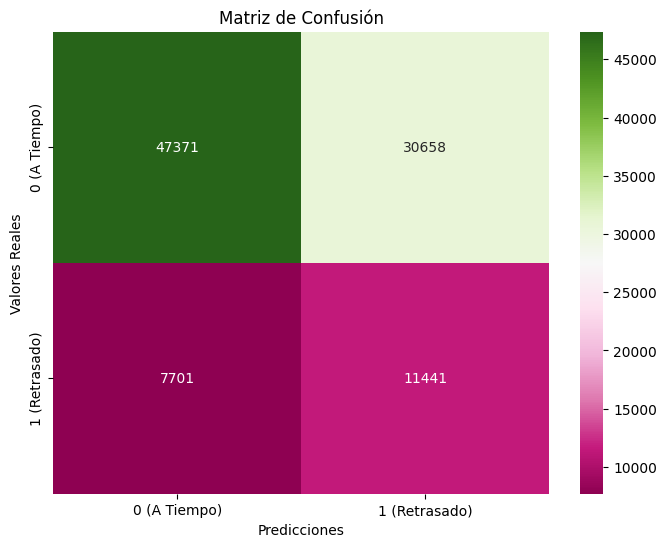


Métricas de Evaluación:
Exactitud (Accuracy):  0.60524
Precisión:  0.27176
Sensibilidad (Recall):  0.59769
F1-score:  0.37364


In [ ]:
# Variables categóricas
categorical_columns = ['CRS_DEP_Category', 'FLDAY_WEEK', 'DISTANCE_Category',
                        'ORIGIN_Size', 'DESCRIPTION_Category', 'ORIGIN_Region',
                        'CRS_TIME_Category']

# Variables independientes y dependiente
X = df [categorical_columns]
y = df ['DELAYS']

# Convertir variables categóricas en variables ficticias utilizando One-Hot Encoding
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inicializar y entrenar el modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier()
modelo_arbol.fit(X_train_smote, y_train_smote)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo_arbol.predict(X_test)

# Evaluar el rendimiento del modelo
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Visualización gráfica de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="PiYG", xticklabels=['0 (A Tiempo)', '1 (Retrasado)'], yticklabels=['0 (A Tiempo)', '1 (Retrasado)'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar las Métricas de Evaluación
print("\n\033[1mMétricas de Evaluación:\033[0m")
print(f"Exactitud (Accuracy): {accuracy: .5f}")
print(f"Precisión: {precision: .5f}")
print(f"Sensibilidad (Recall): {recall: .5f}")
print(f"F1-score: {f1: .5f}")

# Curvas ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

Comparación entre el modelo manual y...

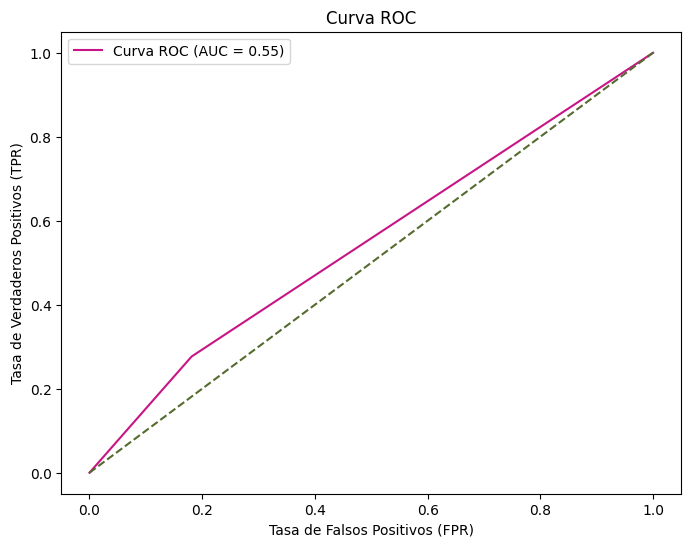

In [ ]:
# Si y_pred contiene etiquetas en lugar de probabilidades, necesitas obtener las probabilidades de la clase positiva (1)
# Aquí asumimos que y_pred contiene probabilidades
y_probs = y_pred

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_true, y_probs)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='mediumvioletred', label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkolivegreen', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()


...el modelo Decision Tree Classifier, balanceado con Class Weight; el cual de acuerdo a las métricas de evaluación es el mejor modelo predictivo

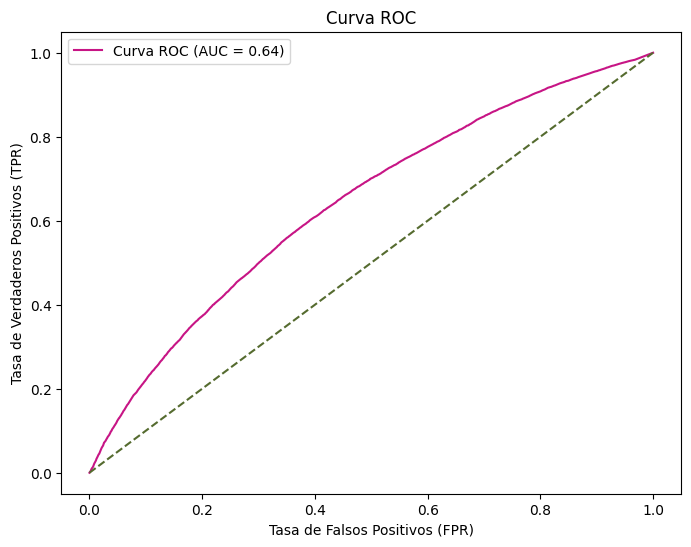

In [ ]:
# Si y_pred contiene etiquetas en lugar de probabilidades, necesitas obtener las probabilidades de la clase positiva (1)
# Aquí asumimos que y_pred contiene probabilidades
y_probs = modelo_arbol.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_probs)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='mediumvioletred', label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkolivegreen', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()